In [22]:
## Data Preprocessing
###import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [23]:
### importing dataset
dataset = pd.read_csv("wind_energy_600_rows.csv")
dataset.head()



,WindSpeed,WindDirection,AirTemperature,AirPressure,PowerOutput
0,8.74,4,32.76,1010.13,3427
1,19.11,91,10.42,1024.74,34841
2,15.18,169,22.04,1009.78,17555
3,12.78,316,32.46,1005.10,10398
4,4.81,21,6.02,1012.88,590


In [24]:
### checking for null values

print(dataset.isnull().sum())


WindSpeed         0
WindDirection     0
AirTemperature    0
AirPressure       0
PowerOutput       0
dtype: int64


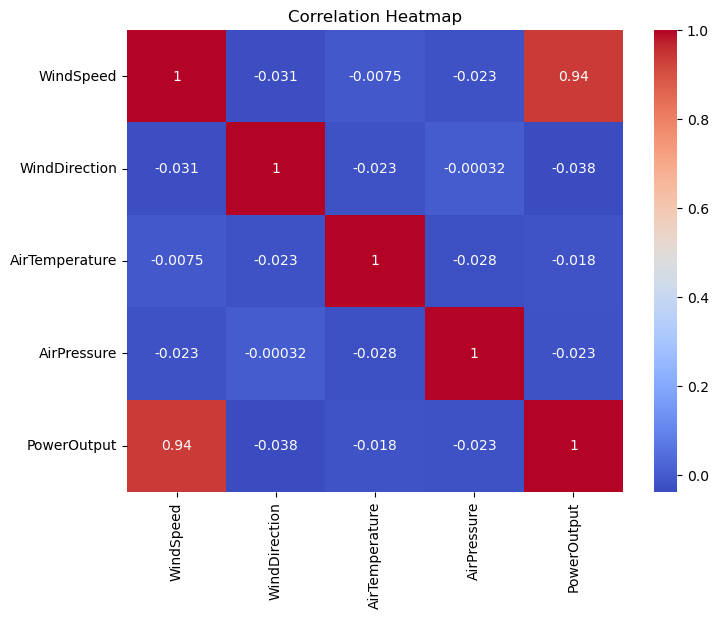

In [25]:
## Data Visualization
### Correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


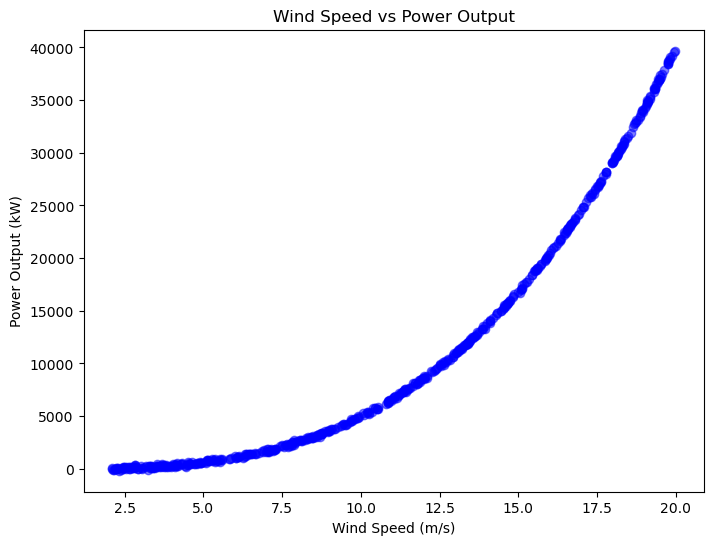

In [26]:
#Scatter plot of Wind Speed vs Power
plt.figure(figsize=(8,6))
plt.scatter(dataset["WindSpeed"], dataset["PowerOutput"], color='blue', alpha=0.5)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.title("Wind Speed vs Power Output")
plt.show()


In [27]:
# Selecting ONLY the features used in the Flask App
X = dataset[['WindSpeed', 'AirTemperature', 'AirPressure']]
y = dataset["PowerOutput"]

In [ ]:
#splitting the dataset into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#model building and training
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model using the training set
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
# testing and evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9998754467148797
Mean Absolute Error: 104.1280833333332
Mean Squared Error: 17341.54147916664


In [31]:
# Save the model to disk
joblib.dump(model, "power_prediction.sav")
print("Success: Model saved and ready for windApp.py!")

Success: Model saved and ready for windApp.py!
